In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import exposure

In [ ]:
!wget -O 'input.jpg' 'https://upload.wikimedia.org/wikipedia/commons/9/95/SunLou2.jpg'

--2023-08-13 18:06:31--  https://upload.wikimedia.org/wikipedia/commons/9/95/SunLou2.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.58.240, 2a02:ec80:600:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.58.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88095 (86K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  86.03K  --.-KB/s    in 0.05s   

2023-08-13 18:06:31 (1.61 MB/s) - ‘input.jpg’ saved [88095/88095]



In [ ]:
image_path = 'input.jpg'
input_image = np.array(Image.open(image_path))
# input_image.shape

In [ ]:
def save_img(np_img, name):
  pillow_img = Image.fromarray(np.uint8(np_img)).convert('RGB')
  pillow_img.save('/content/'+name+'.png')
  display(pillow_img)

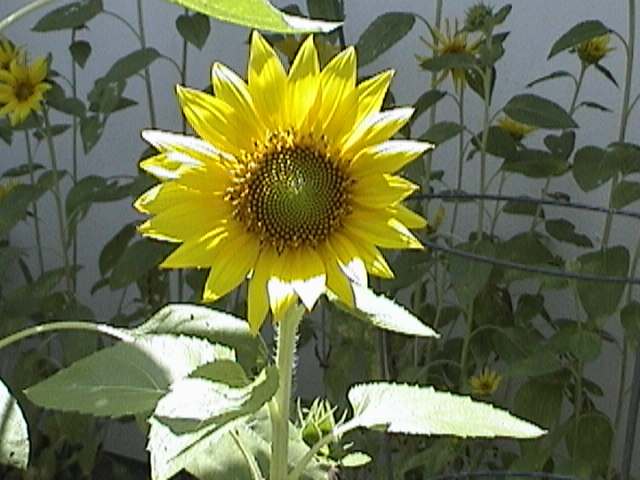

In [ ]:
save_img(input_image, 'original')

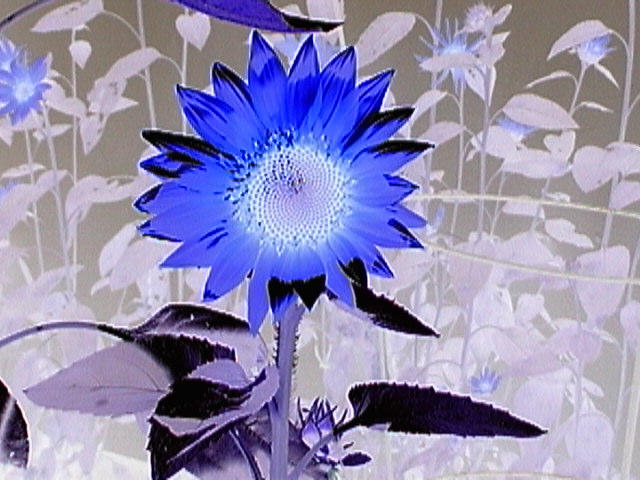

In [ ]:
negative_image = 255 - input_image
save_img(negative_image, 'negative')

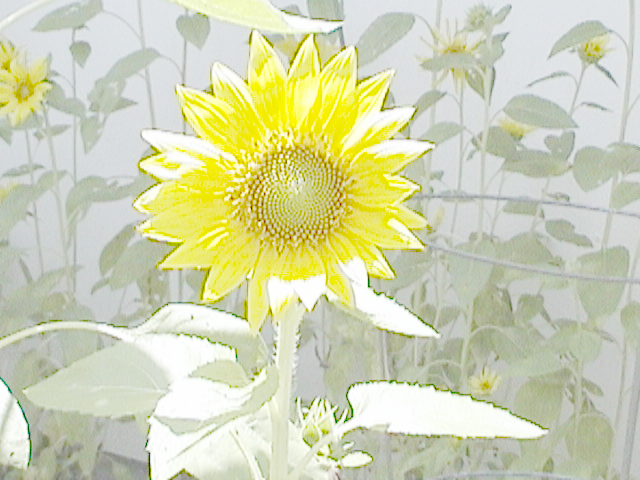

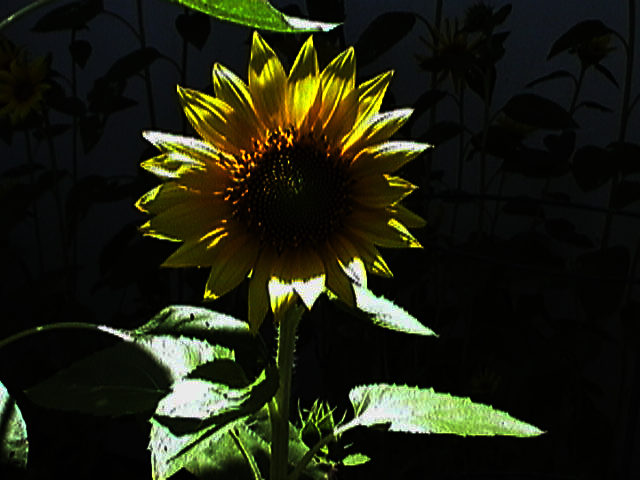

In [ ]:
c = 255/(np.log(1+255))
log_transformed_image = c*np.log1p(input_image)
save_img(log_transformed_image, 'log_transformed_image')
antilog_transformed_image = np.exp(input_image/c)
save_img(antilog_transformed_image, 'antilog_transformed_image')

In [ ]:
gamma_values = [0.4, 2.5, 10, 25, 100]
gamma_corrected_images = []

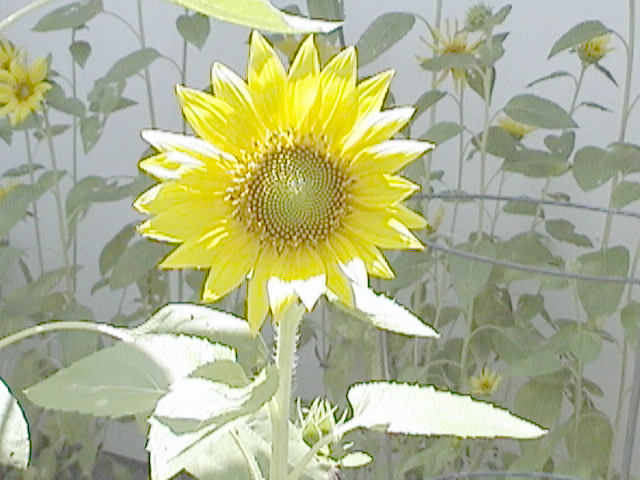

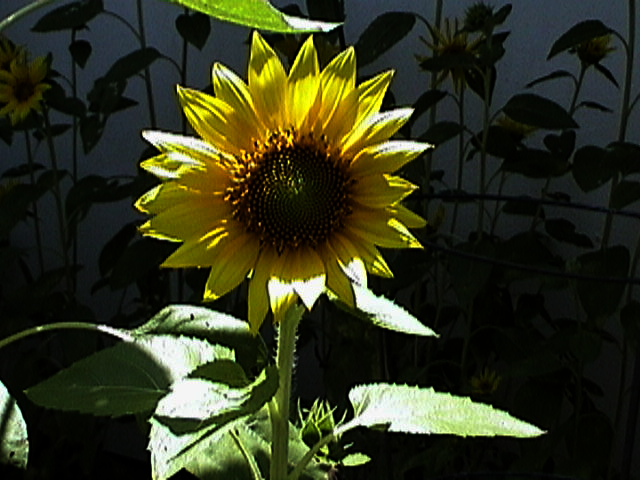

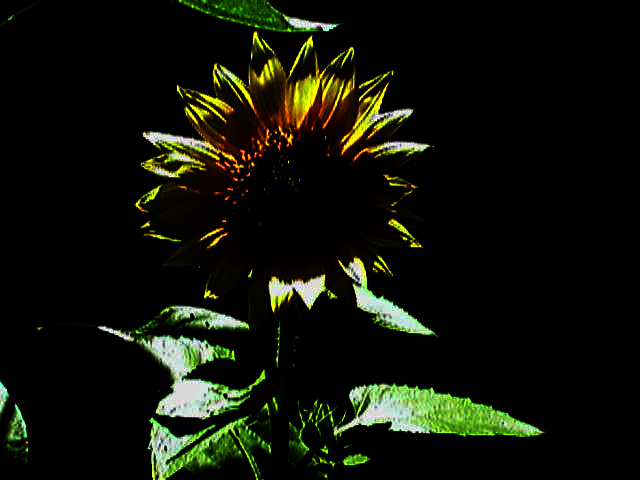

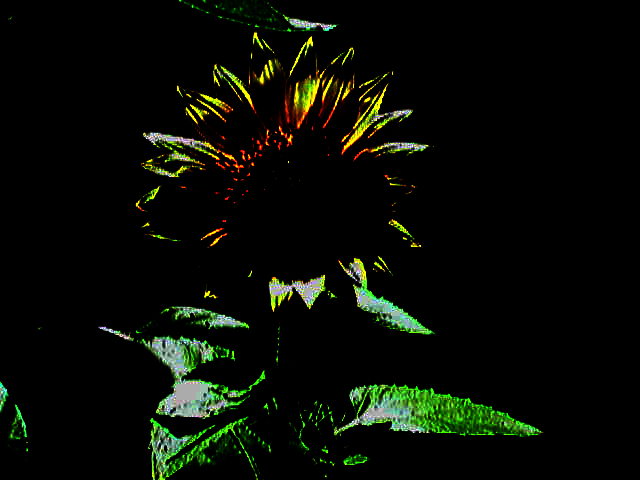

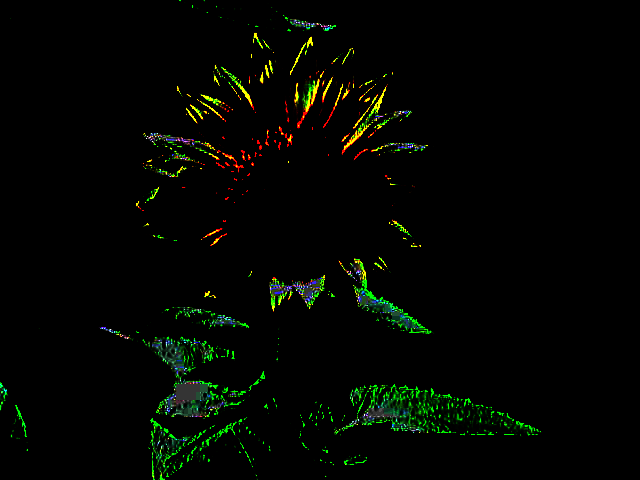

In [ ]:
for gamma in gamma_values:
    img = np.power(input_image / 255.0, gamma) * 255.0
    gamma_corrected_images.append(img)
    save_img(img, 'gamma_'+str(gamma))

In [ ]:
power_2_image = np.power(input_image, 2)
power_3_image = np.power(input_image, 3)
power_4_image = np.power(input_image, 4)

In [ ]:
import matplotlib
matplotlib.scale.get_scale_names()

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']

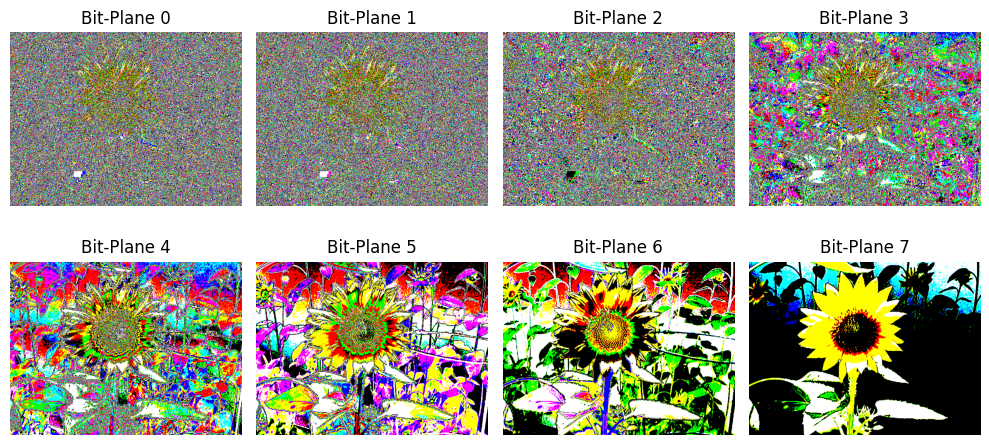

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(8):
    bit_plane = ((input_image >> i) & 1).astype(float)
    plt.subplot(2, 4, i + 1)
    plt.imshow(bit_plane)
    plt.title(f'Bit-Plane {i}')
    plt.axis('off')
plt.tight_layout()

Text(0.5, 1.0, 'Original Image Histogram')

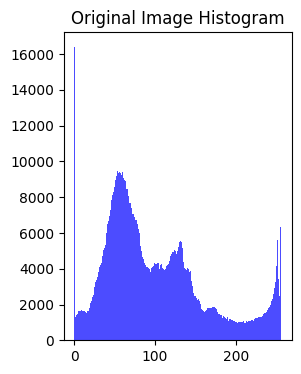

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.hist(input_image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Original Image Histogram')

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Text(0.5, 1.0, 'Histogram Equalization')

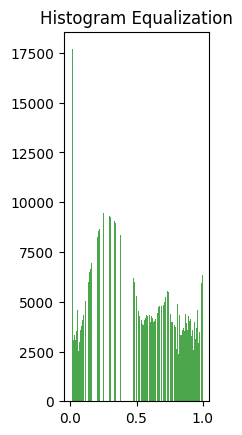

In [ ]:
histeq_image = exposure.equalize_hist(input_image)
plt.subplot(1, 3, 2)
plt.hist(histeq_image.ravel(), bins=256, range=(0, 1), color='green', alpha=0.7)
plt.title('Histogram Equalization')

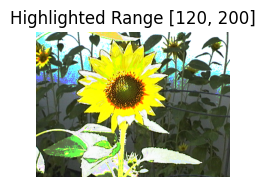

In [ ]:
highlighted_range_image = input_image.copy()
# highlighted_range_image[highlighted_range_image < 0] = 0
# highlighted_range_image[highlighted_range_image > 255] = 255
highlighted_range_image[(highlighted_range_image >= 120) & (highlighted_range_image <= 200)] = 255
plt.subplot(1, 3, 3)
plt.imshow(highlighted_range_image , cmap='gray')
plt.title('Highlighted Range [120, 200]')
plt.axis('off')
plt.tight_layout()

plt.show()

(array([ 16400.,   1286.,   1425.,   1515.,   1457.,   1616.,   1655.,
          1648.,   1699.,   1668.,   1642.,   1620.,   1648.,   1506.,
          1565.,   1538.,   1647.,   1616.,   1704.,   1818.,   2094.,
          2205.,   2400.,   2547.,   2789.,   2997.,   3242.,   3384.,
          3564.,   3760.,   3837.,   4104.,   4211.,   4318.,   4536.,
          4684.,   5029.,   5160.,   5347.,   5752.,   5987.,   6500.,
          6664.,   6936.,   7285.,   7524.,   7819.,   8131.,   8279.,
          8544.,   8655.,   8983.,   9176.,   9446.,   9351.,   9515.,
          9386.,   9325.,   9264.,   9395.,   9034.,   9061.,   8964.,
          8911.,   8461.,   8483.,   8371.,   8092.,   7681.,   7666.,
          7387.,   7245.,   7045.,   7082.,   6905.,   6745.,   6816.,
          6698.,   6474.,   6211.,   6004.,   5487.,   5277.,   4986.,
          4647.,   4524.,   4324.,   4305.,   4207.,   4107.,   4085.,
          4025.,   3879.,   3987.,   3817.,   4066.,   4095.,   4165.,
      

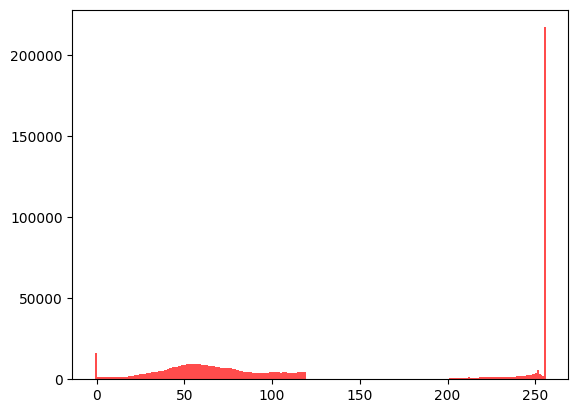

In [ ]:
# plt.hist(input_image.ravel(), bins=256, range=(-1, 256), color='blue', alpha=0.7)
# plt.hist(highlighted_range_image.ravel(), bins=256, range=(-1, 256), color='red', alpha=0.7)

Conclusion: We have selected an image and performed image processing operations. We have manipulated the image according to each function by enhancing different aspects of the image's intensity values, highlighting specific ranges

Negative Transformation : Inverted intensity values resulting in photographic negative effect.

Log and Antilog Transformations: We change the intensity values.
Log - Compress the intensity values.
Antilog- Expand intensity values

Gamma Correction: We adjusted contrast and brightness levels. Lower gamma values (< 1) enhanced dark regions, while higher gamma values (> 1) enhanced brighter regions.

Power Transformations: We raised the image to different powers and altered the intensity levels.Lower powers (< 1) enhanced darker regions, while higher powers (> 1) enhanced brighter regions.

Bit-Planes: Reveals finer details at each bit level.

Histogram Equalization: This improved the overall contrast and distribution of intensity values in the image, enhancing its visual appearance.

Range Highlighting Transformation: A custom transformation was applied to brighten the intensities within the range [120, 200] while leaving other levels unchanged. This resulted in a visually highlighted range.

